In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("CBS_2021-2023_Hourly_Weather_Extended.csv", sep =',')

df.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),is_weekend,day_type,is_holiday,season,Temperature Category,Weather Category,wind_category
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,False,Workday,Yes,Winter,Cold,Dry Day,Moderate Wind (10-20 km/h)
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,False,Workday,Yes,Winter,Cold,Dry Day,Moderate Wind (10-20 km/h)
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,False,Workday,Yes,Winter,Cold,Dry Day,Moderate Wind (10-20 km/h)
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,False,Workday,Yes,Winter,Cold,Dry Day,Moderate Wind (10-20 km/h)
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,False,Workday,Yes,Winter,Cold,Dry Day,Low Wind (<10 km/h)


In [76]:
# Sicherstellen, dass Date-Spalte im richtigen Format ist
df["Date"] = pd.to_datetime(df["Date"])
# Extract year column
df["year"] = df["Date"].dt.year

In [ ]:
#check the missing value
df['Total_rides'].isna().sum()


np.int64(11)

In [6]:
#fill the missing value with 0
df['Total_rides'].fillna(0, inplace=True)


C:\Users\Tiba\AppData\Local\Temp\ipykernel_21320\2255754348.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total_rides'].fillna(0, inplace=True)


In [7]:
sum(df['Total_rides'])

10693997.0

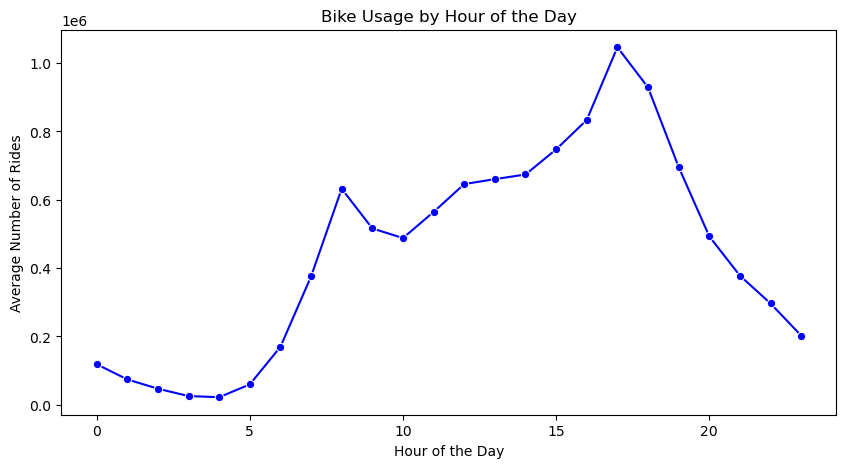

In [26]:
#wann ist Stoßzeit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sicherstellen, dass Date-Spalte im richtigen Format ist
df["Date"] = pd.to_datetime(df["Date"])

# Stunde extrahieren
#df["hour"] = df["Date"].dt.hour

# Stündliche Durchschnittswerte berechnen
hourly_rides = df.groupby("Hour")["Total_rides"].sum().reset_index()

# Diagramm erstellen
plt.figure(figsize=(10,5))
sns.lineplot(x="Hour", y="Total_rides", data=hourly_rides, marker="o", color="blue")

# Achsenbeschriftungen & Titel
plt.xlabel("Hour of the Day")
plt.ylabel("Average Number of Rides")
plt.title("Bike Usage by Hour of the Day")

# Diagramm anzeigen
plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_21320\2403577632.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Weather Category", y="Total_rides", data=rain_impact, palette="coolwarm")


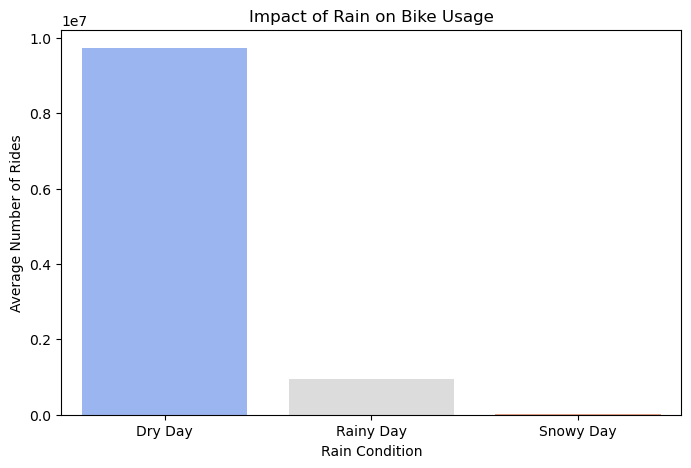

In [24]:
#Einflusss vom Regen auf die Anzahl der Fahrten

# Durchschnittliche Fahrten pro Regenkategorie berechnen
rain_impact = df.groupby("Weather Category")["Total_rides"].sum().reset_index()

# Balkendiagramm erstellen
plt.figure(figsize=(8,5))
sns.barplot(x="Weather Category", y="Total_rides", data=rain_impact, palette="coolwarm")

# Achsenbeschriftungen & Titel
plt.xlabel("Rain Condition")
plt.ylabel("Average Number of Rides")
plt.title("Impact of Rain on Bike Usage")

plt.show()


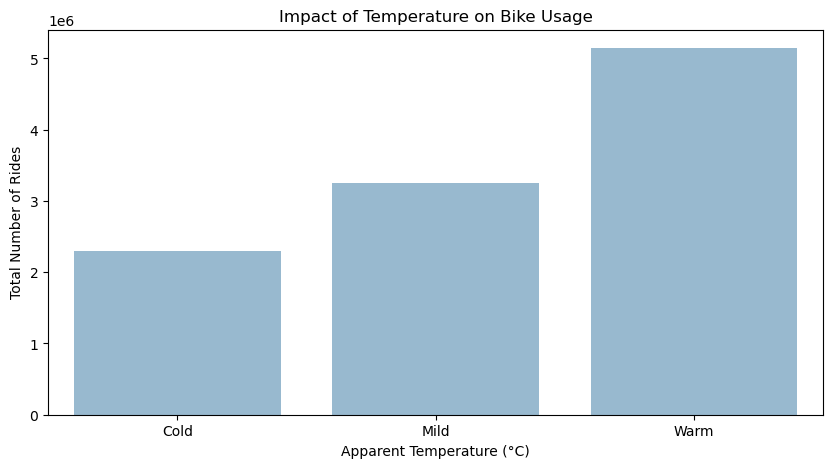

In [ ]:
#Einfluss von Temperatur auf die Anzahl der Fahrten
# Diagramm erstellen
# Durchschnittliche Fahrten pro Regenkategorie berechnen
temp_impact = df.groupby("Temperature Category")["Total_rides"].sum().reset_index()


plt.figure(figsize=(10,5))
sns.barplot(x="Temperature Category", y="Total_rides", data=temp_impact, alpha=0.5)

# Achsenbeschriftungen & Titel
plt.xlabel("Apparent Temperature (°C)")
plt.ylabel("Total Number of Rides")
plt.title("Impact of Temperature on Bike Usage")

plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_21320\712853409.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_impact = df.groupby("wind_category")["Total_rides"].sum().reset_index()
C:\Users\Tiba\AppData\Local\Temp\ipykernel_21320\712853409.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="wind_category", y="Total_rides", data=wind_impact, palette="coolwarm")


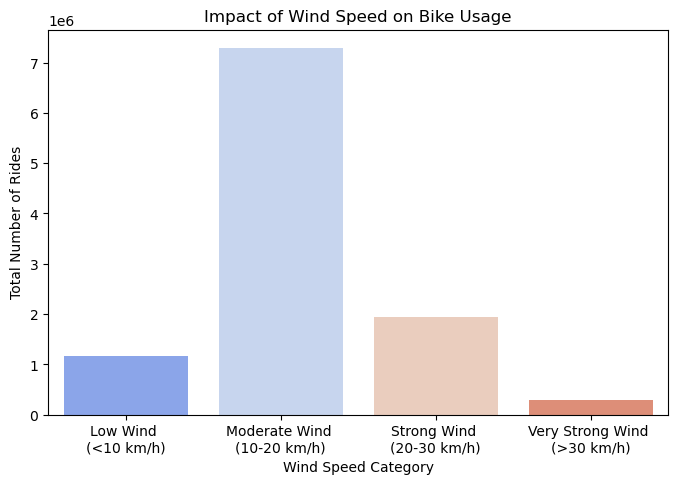

In [43]:
#Einfluss von Windgeschwindigkeit auf die Anzahl der Fahrten
# Durchschnittliche Fahrten pro Regenkategorie berechnen    
wind_impact = df.groupby("wind_category")["Total_rides"].sum().reset_index()

#Beschriftung der XAchse
wind_impact["wind_category"] = wind_impact["wind_category"].str.replace("(", "\n(", regex=False)

# Balkendiagramm erstellen
plt.figure(figsize=(8,5))
sns.barplot(x="wind_category", y="Total_rides", data=wind_impact, palette="coolwarm")   


# Achsenbeschriftungen & Titel
plt.xlabel("Wind Speed Category")
plt.ylabel("Total Number of Rides")
plt.title("Impact of Wind Speed on Bike Usage")

plt.show()


In [39]:
df = pd.read_csv("CBS_2021-2023_Daily_Weather_Extended.csv", sep =',')
df.head()


,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),is_weekend,day_type,is_holiday,season,warm_day,rainy_day
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,False,Workday,Yes,Winter,No,Yes
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,True,Weekend,No,Winter,No,Yes
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,True,Weekend,No,Winter,No,Yes
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,False,Workday,No,Winter,No,No
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,False,Workday,No,Winter,No,Yes


In [40]:
# Erstellen einer Wind-Kategorie für sinnvollere Gruppierung
def categorize_wind(speed):
    if speed < 10:
        return "Low Wind (<10 km/h)"
    elif speed < 20:
        return "Moderate Wind (10-20 km/h)"
    elif speed < 30:
        return "Strong Wind (20-30 km/h)"
    else:
        return "Very Strong Wind (>30 km/h)"

df["wind_category"] = df["windspeed_10m_max (km/h)"].apply(categorize_wind)

# 🔹 Richtige Kategorie-Namen setzen (genau wie in `categorize_wind()`)
wind_order = ["Low Wind (<10 km/h)", "Moderate Wind (10-20 km/h)", 
              "Strong Wind (20-30 km/h)", "Very Strong Wind (>30 km/h)"]

# 🔹 Kategorische Reihenfolge festlegen
df["wind_category"] = pd.Categorical(df["wind_category"], categories=wind_order, ordered=True)

df.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),is_weekend,day_type,is_holiday,season,warm_day,rainy_day,wind_category
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,False,Workday,Yes,Winter,No,Yes,Moderate Wind (10-20 km/h)
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,True,Weekend,No,Winter,No,Yes,Moderate Wind (10-20 km/h)
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,True,Weekend,No,Winter,No,Yes,Moderate Wind (10-20 km/h)
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,False,Workday,No,Winter,No,No,Moderate Wind (10-20 km/h)
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,False,Workday,No,Winter,No,Yes,Low Wind (<10 km/h)


C:\Users\Tiba\AppData\Local\Temp\ipykernel_21320\1971171052.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="wind_category", y="Total_rides", data=wind_impact, palette="coolwarm")


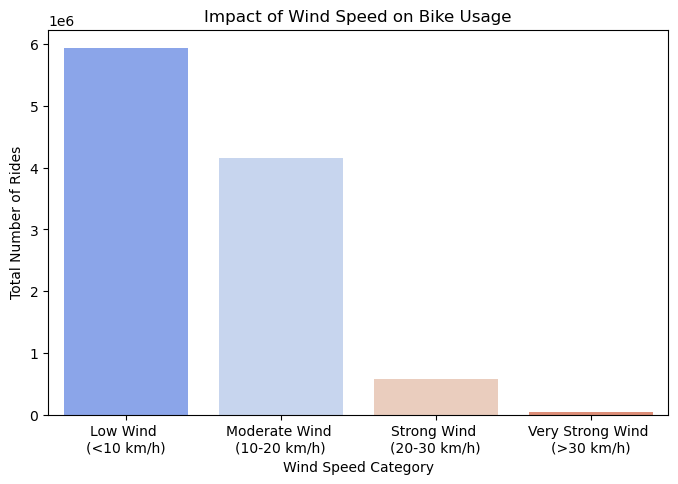

In [81]:
#Einfluss von Windgeschwindigkeit auf die Anzahl der Fahrten
# Durchschnittliche Fahrten pro Regenkategorie berechnen    
wind_impact = df.groupby("wind_category")["Total_rides"].sum().reset_index()

#Beschriftung der XAchse
wind_impact["wind_category"] = wind_impact["wind_category"].str.replace("(", "\n(", regex=False)

# Balkendiagramm erstellen
plt.figure(figsize=(8,5))
sns.barplot(x="wind_category", y="Total_rides", data=wind_impact, palette="coolwarm")   
# Achsenbeschriftungen & Titel
plt.xlabel("Wind Speed Category")
plt.ylabel("Total Number of Rides")
plt.title("Impact of Wind Speed on Bike Usage")

plt.show()

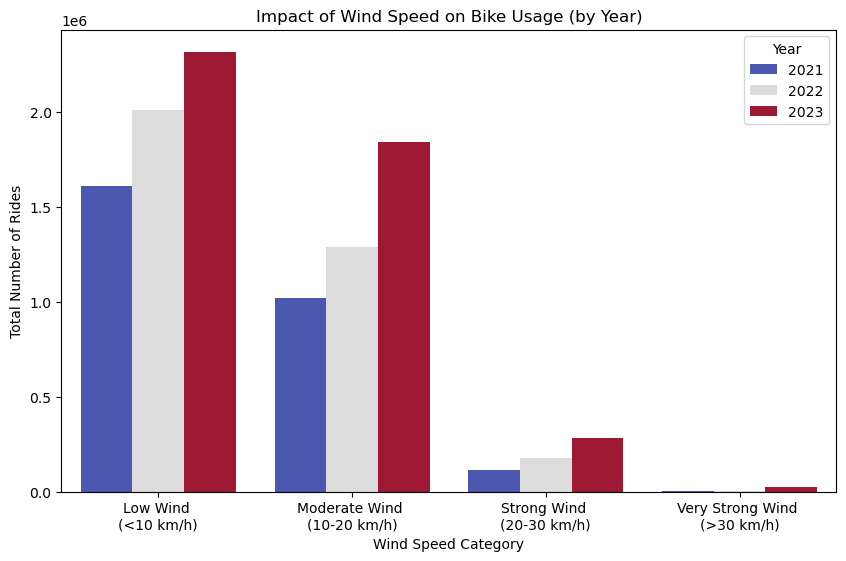

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the Date column is in datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Extract year
df["year"] = df["Date"].dt.year

# Aggregate total rides per wind category and year
wind_impact_yearly = df.groupby(["year", "wind_category"])["Total_rides"].sum().reset_index()

# Adjust X-axis labels to improve readability
wind_impact_yearly["wind_category"] = wind_impact_yearly["wind_category"].str.replace("(", "\n(", regex=False)

# Create bar plot with wind speed category per year
plt.figure(figsize=(10,6))
sns.barplot(x="wind_category", y="Total_rides", hue="year", data=wind_impact_yearly, palette="coolwarm")

# Labels & Title
plt.xlabel("Wind Speed Category")
plt.ylabel("Total Number of Rides")
plt.title("Impact of Wind Speed on Bike Usage (by Year)")

# Show legend
plt.legend(title="Year")

# Display plot
plt.show()
